In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from PIL import Image
from skimage import measure, color
from skimage.io import imread
from tifffile import imwrite

from src.processing.marching_squares import marching_squares_contours, plot_contours
from src.processing.constants import BUCKLING_PATH

Load stack and images

In [2]:
bio_stack = imread(str(BUCKLING_PATH / '200920_biolight_nobg_nooutliers_despeckle_enhance.tif'))
bright_stack = imread(str(BUCKLING_PATH / '200920_normallight_nobg_edges_gaussblur_enhance.tif'))

In [3]:
slice_no_bio = 150
STACK_B_TO_N_RATIO = len(bio_stack) / len(bright_stack)
slice_no_bright = int(slice_no_bio / STACK_B_TO_N_RATIO)

In [4]:
img_b = bio_stack[slice_no_bio]
img_n = bright_stack[slice_no_bright]

Find marching squares contours and plot

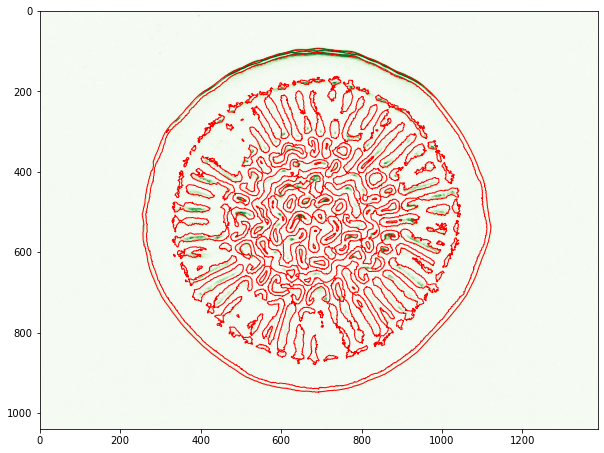

In [6]:
contours = marching_squares_contours(img_b, 50, 20)
grey_image = plot_contours(contours, img_n)